# Feature Engineering für eine Drohnen Fernsteuerung, die mit einem MPU6050 ausgestattet ist

## 1. Einlesen der Datei und überprüfen, ob die Datenreihen vollständig sind

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as scatmat
import os


# Absolute Pfad zur Datei extrahieren
#ziel_pfad = 'D:\measurements'
ziel_pfad = '../Daten/'

# CSV-Datei einlesen
data = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050_lennard_run1.csv'), sep=',', decimal='.')
data2 = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050_lennard_run2.csv'), sep=',', decimal='.')
data = pd.concat([data, data2], ignore_index=True)

# Die ersten Zeilen anzeigen
data.head()

# Informationen über den Datensatz anzeigen
data.info()

# Sind alle Klassen gleich stark vertreten?
data['RuheState'].value_counts()

# Gibt es Auffälligkeiten bei der Verteilung der Werte?

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         9120 non-null   float64
 1   AccY         9120 non-null   float64
 2   AccZ         9120 non-null   float64
 3   GyroX        9120 non-null   float64
 4   GyroY        9120 non-null   float64
 5   GyroZ        9120 non-null   float64
 6   AngleX       9120 non-null   float64
 7   AngleY       9120 non-null   float64
 8   AngleZ       9120 non-null   float64
 9   AccAngleX    9120 non-null   float64
 10  AccAngleY    9120 non-null   float64
 11  RuheState    9120 non-null   int64  
 12  FernstState  9120 non-null   int64  
 13  TranspState  9120 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 997.6 KB


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,AngleX,AngleY,AngleZ,AccAngleX,AccAngleY,RuheState,FernstState,TranspState
count,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000
mean,-0.124444,0.120000,0.897729,-0.187314,-0.457338,-2.290510,7.328550,7.227452,-644.019330,7.175341,3.379365,0.319079,0.351974,0.328947
std,0.501435,0.421644,0.337752,41.130489,38.532537,38.004965,35.513037,33.610919,474.705076,29.835002,26.025703,0.466145,0.477612,0.469857
min,-1.640134,-1.847535,-1.105839,-498.599823,-299.504578,-270.363739,-178.105057,-89.975670,-2336.003662,-179.495193,-88.617310,0.000000,0.000000,0.000000
25%,-0.404477,-0.013063,0.761731,-5.065466,-6.470230,-4.305595,-1.009308,-0.168664,-799.939331,-0.730754,-3.144068,0.000000,0.000000,0.000000
50%,-0.119626,0.033687,0.993933,0.407817,0.235877,-0.317954,1.777564,8.704584,-526.080566,1.358691,6.803437,0.000000,0.000000,0.000000
75%,0.054507,0.327636,1.036605,6.341107,5.233182,1.483573,15.253549,29.498145,-327.444359,18.005214,21.259746,1.000000,1.000000,1.000000
max,1.857852,1.776244,2.463436,470.987976,354.999237,264.063751,161.326920,89.965271,71.008202,178.724503,86.276085,1.000000,1.000000,1.000000


## 2. Irrelevante Merkmale entfernen

In [2]:
# data = data.drop(['user', 'gender'], axis=1)

# 3. Visualisierung der Verteilung der numerischen Werte

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Überprüfen, ob es fehlerhafte Werte gibt (Bspw.: in Spalte 'AccX')

In [4]:
pd.set_option('display.max_rows', 300)
data['AccX'].value_counts()

-0.030027    27
-0.027830    25
-0.117917    25
-0.126951    25
-0.029783    24
             ..
 0.554546     1
-0.690897     1
-0.279294     1
 0.492779     1
-0.737302     1
Name: AccX, Length: 4662, dtype: int64

## 5. Fehlerhaften Wert korrigieren (Beispiel)

In [5]:
#data.loc[data['z4'] == '-14420-11-2011 04:50:23.713', 'z4'] = -144

# Spalte 'z4' in numerischen Typ umwandeln
#data['z4'] = pd.to_numeric(data['z4'])

# Informationen über den Datensatz erneut anzeigen
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         9120 non-null   float64
 1   AccY         9120 non-null   float64
 2   AccZ         9120 non-null   float64
 3   GyroX        9120 non-null   float64
 4   GyroY        9120 non-null   float64
 5   GyroZ        9120 non-null   float64
 6   AngleX       9120 non-null   float64
 7   AngleY       9120 non-null   float64
 8   AngleZ       9120 non-null   float64
 9   AccAngleX    9120 non-null   float64
 10  AccAngleY    9120 non-null   float64
 11  RuheState    9120 non-null   int64  
 12  FernstState  9120 non-null   int64  
 13  TranspState  9120 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 997.6 KB


## MinMaxScaler 

In [65]:
# Skalieren

from sklearn.preprocessing import MinMaxScaler
#data.drop('class', axis=1, inplace=True) # Ist bereits in Schritt 11 erfolgt
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#print("data_scaled.shape:", data_scaled.shape, "\ndata_scaled:\n", data_scaled) # uncomment to visualize details

# Robust Scaler 

In [66]:
# Das ist eine Alternative zum MinMaxScaler, der robust gegenüber auffällig hohen / tiefen Werten ist

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)

# Standardabweichung berechnen

In [67]:
# Blockgröße für Berechnungen
chunk_size = 30

data_scaled_pp_df = pd.DataFrame(data_scaled, columns=data.columns)

# Anzahl der Blöcke berechnen
num_chunks = len(data_scaled_pp_df) // chunk_size

# Verarbeitung in Blöcken durchführen
processed_data_list = []

for i in range(num_chunks):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size

    chunk = data_scaled_pp_df.iloc[start_index:end_index, :]

    # Standardabweichung für ausgewählte Spalten berechnen
    selected_columns = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'AccAngleX', 'AccAngleY']
    std_deviation = chunk[selected_columns].std().to_frame().transpose()

    # Mittelwert für andere Spalten berechnen
    other_columns = ['RuheState', 'FernstState', 'TranspState']
    mean_values = chunk[other_columns].mean().to_frame().transpose()

    # Neue Daten erstellen
    processed_data = pd.concat([std_deviation, mean_values], axis=1)
    
    processed_data_list.append(processed_data)

# Alle berechneten Blöcke zusammenführen
result_data = pd.concat(processed_data_list, ignore_index=True)

result_data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,AngleX,AngleY,AngleZ,AccAngleX,AccAngleY,RuheState,FernstState,TranspState
0,0.590076,0.482139,0.593857,2.898860,6.817292,11.219566,0.653033,1.391882,0.050580,0.484182,0.595847,0.0,0.0,1.0
1,0.643513,0.634474,0.905397,2.427609,3.746630,7.006120,0.581494,0.764272,0.073811,0.525120,0.540015,0.0,0.0,1.0
2,0.532066,0.497241,0.853755,1.740741,3.235376,6.350787,0.476021,0.535679,0.029740,0.430536,0.461343,0.0,0.0,1.0
3,0.418201,0.540842,0.721449,1.708017,2.398082,5.156932,0.376013,0.288011,0.051433,0.424461,0.341526,0.0,0.0,1.0
4,0.482453,0.553340,0.992473,2.568790,4.256631,7.890122,1.093375,1.215285,0.097986,0.461859,0.390394,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.013408,0.010436,0.029364,0.011180,0.012857,0.018874,0.004170,0.000846,0.000426,0.010718,0.012538,1.0,0.0,0.0
300,0.007559,0.010818,0.014829,0.010129,0.016779,0.017552,0.001727,0.000560,0.000424,0.011149,0.008335,1.0,0.0,0.0
301,0.005313,0.008678,0.015759,0.013497,0.024577,0.018408,0.002361,0.001087,0.000421,0.008953,0.005900,1.0,0.0,0.0
302,0.005523,0.010813,0.019657,0.009274,0.015672,0.013317,0.002230,0.000549,0.000444,0.011114,0.006038,1.0,0.0,0.0


## 6. Aufteilung des Datensatzes in Trainings- und Validierungsdaten

In [68]:
# Aufteilung in Trainings- und Validierungsdatensätze
train, val = train_test_split(result_data, test_size=0.1, random_state=42)

# Anzahl der Datensätze anzeigen
len(train), len(val)

# Kopie des Trainingsdatensatzes für Modifikationen
data_scaled = train.copy()


## 7. Begrenzung der Auswahl auf die Sensorspalten

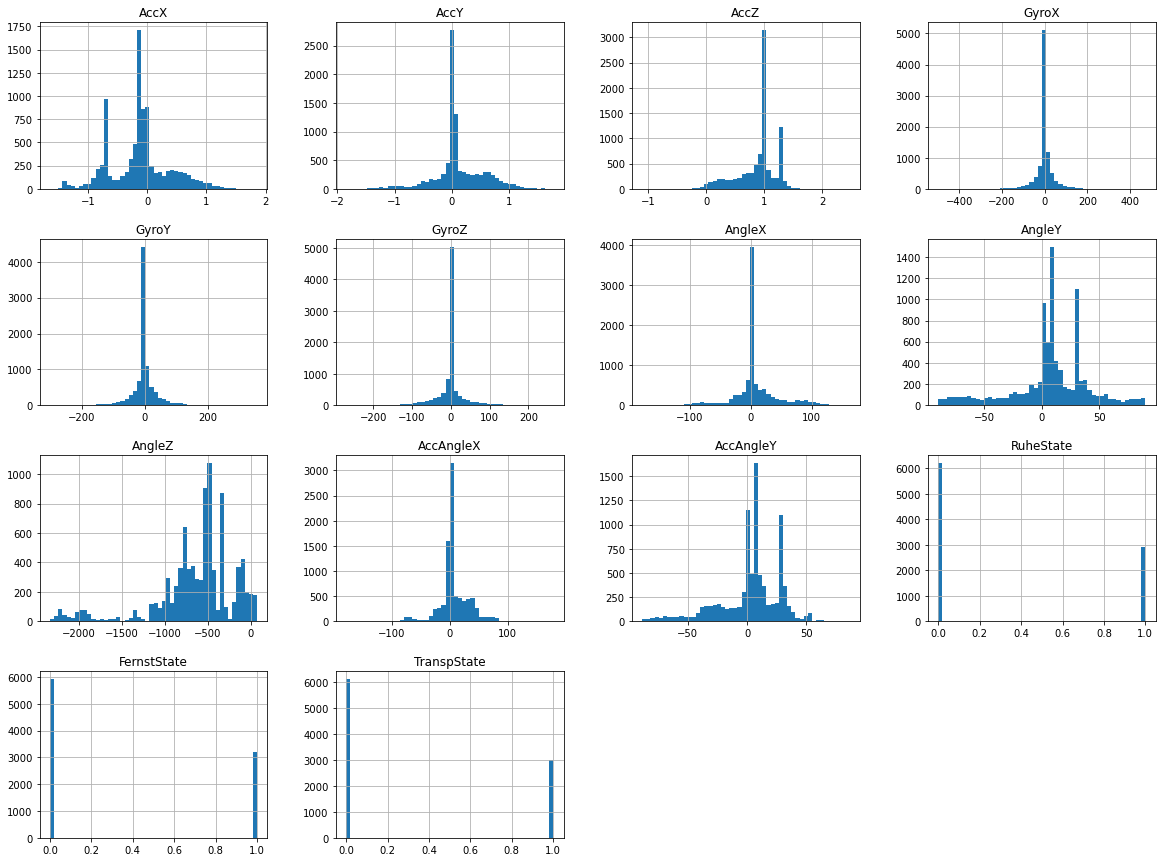

In [18]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 8. Prüfung der Korrelationen für verschiedene Sensoren

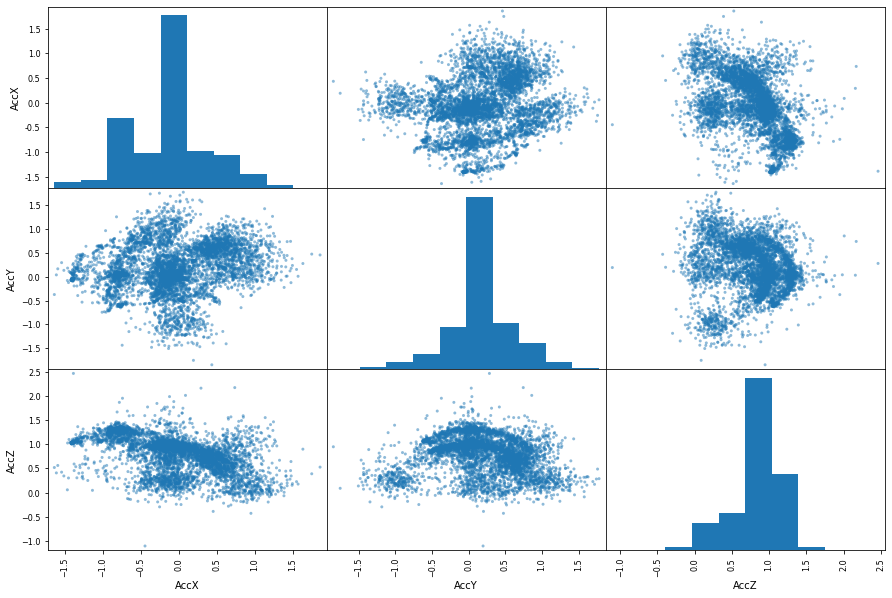

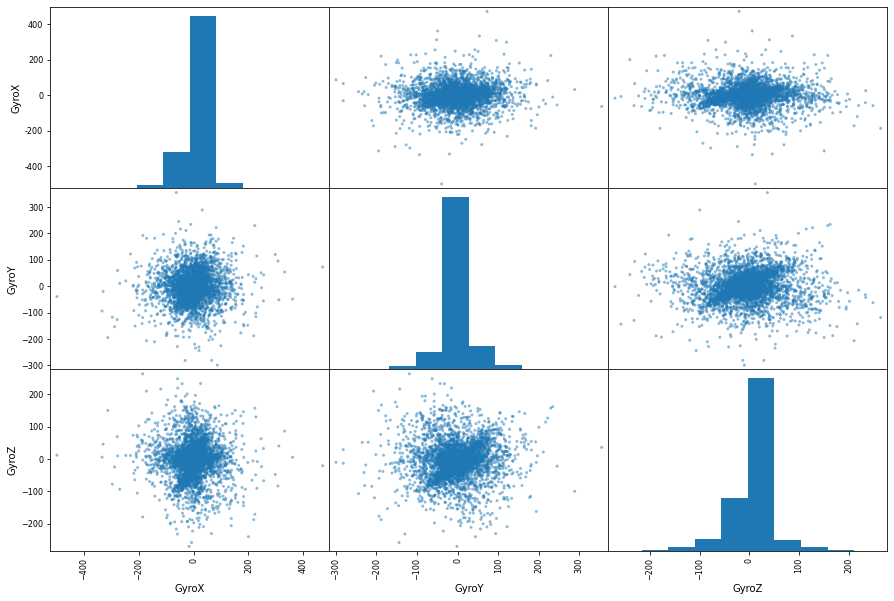

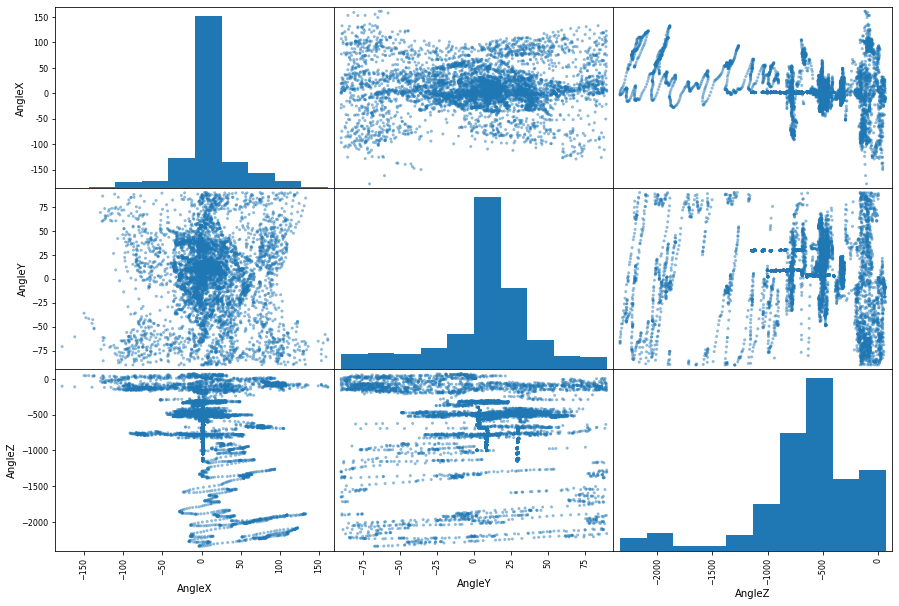

In [19]:
sensors = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

for sensor_group in [sensors[:3], sensors[3:6], sensors[6:9]]:
    scatmat(data[sensor_group], figsize=(15, 10))
    plt.show()

## 9. Visualisierung der Klassenzuordnung im Scatterplot

In [20]:
# Gruppiere nach den Klassenattributen und zähle die Anzahl der Vorkommen
class_counts = data.groupby(['RuheState', 'FernstState', 'TranspState']).size().reset_index(name='count')

# Anzeige aller Kombinationen
for i, row in class_counts.iterrows():
    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']} - Anzahl: {row['count']}")


Klasse 0: Ruhe=0, Fernsteuerung=0, Transport=1 - Anzahl: 3000
Klasse 1: Ruhe=0, Fernsteuerung=1, Transport=0 - Anzahl: 3210
Klasse 2: Ruhe=1, Fernsteuerung=0, Transport=0 - Anzahl: 2910


## 10. Scatterplots der unskalierten Daten für verschiedene Sensorpaare

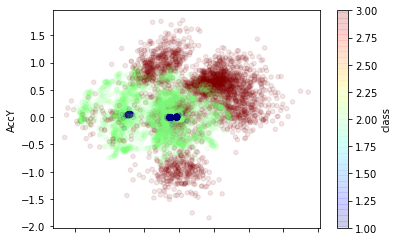

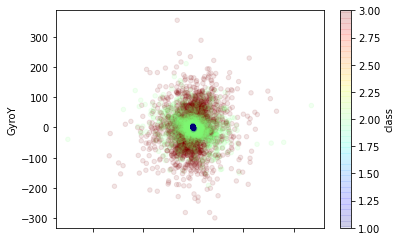

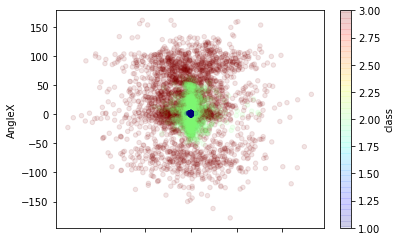

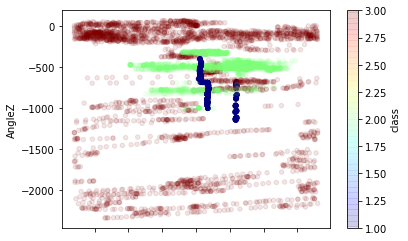

In [21]:
# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data['class'] = data.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Visualisiere Scatterplots für jedes Sensor-Paar
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class', cmap=plt.get_cmap('jet'))
    #plt.title(f'Unskalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data.drop('class', axis=1, inplace=True)


## 11. One Hot encoding der Klasse durchführen, wenn noch nicht geschehen (Beispiel)

In [22]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(categories='auto');
#data_label_matrix = data["class"].values.reshape(-1, 1)
#data_labels_1hot = encoder.fit_transform(data_label_matrix)
#data_labels_1hot.shape

## 14. Skatterplots von Messwertpaaren mit vorheriger Skalierung

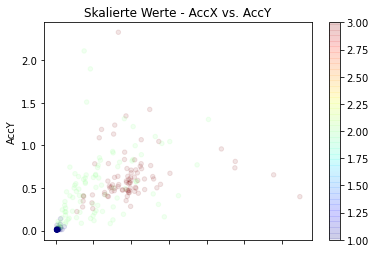

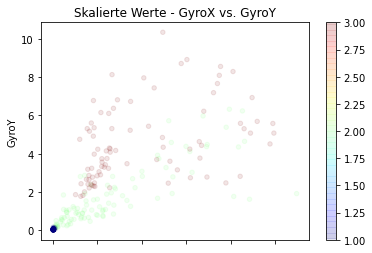

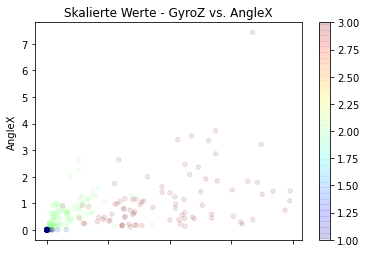

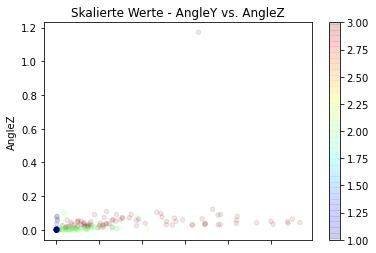

In [23]:
# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)


# Visualisiere Scatterplots für jedes Sensor-Paar mit den skalierten Werten und den originalen Klassen
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data_scaled_df.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
    plt.title(f'Skalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
#data_scaled_df.drop('class', axis=1, inplace=True)


36


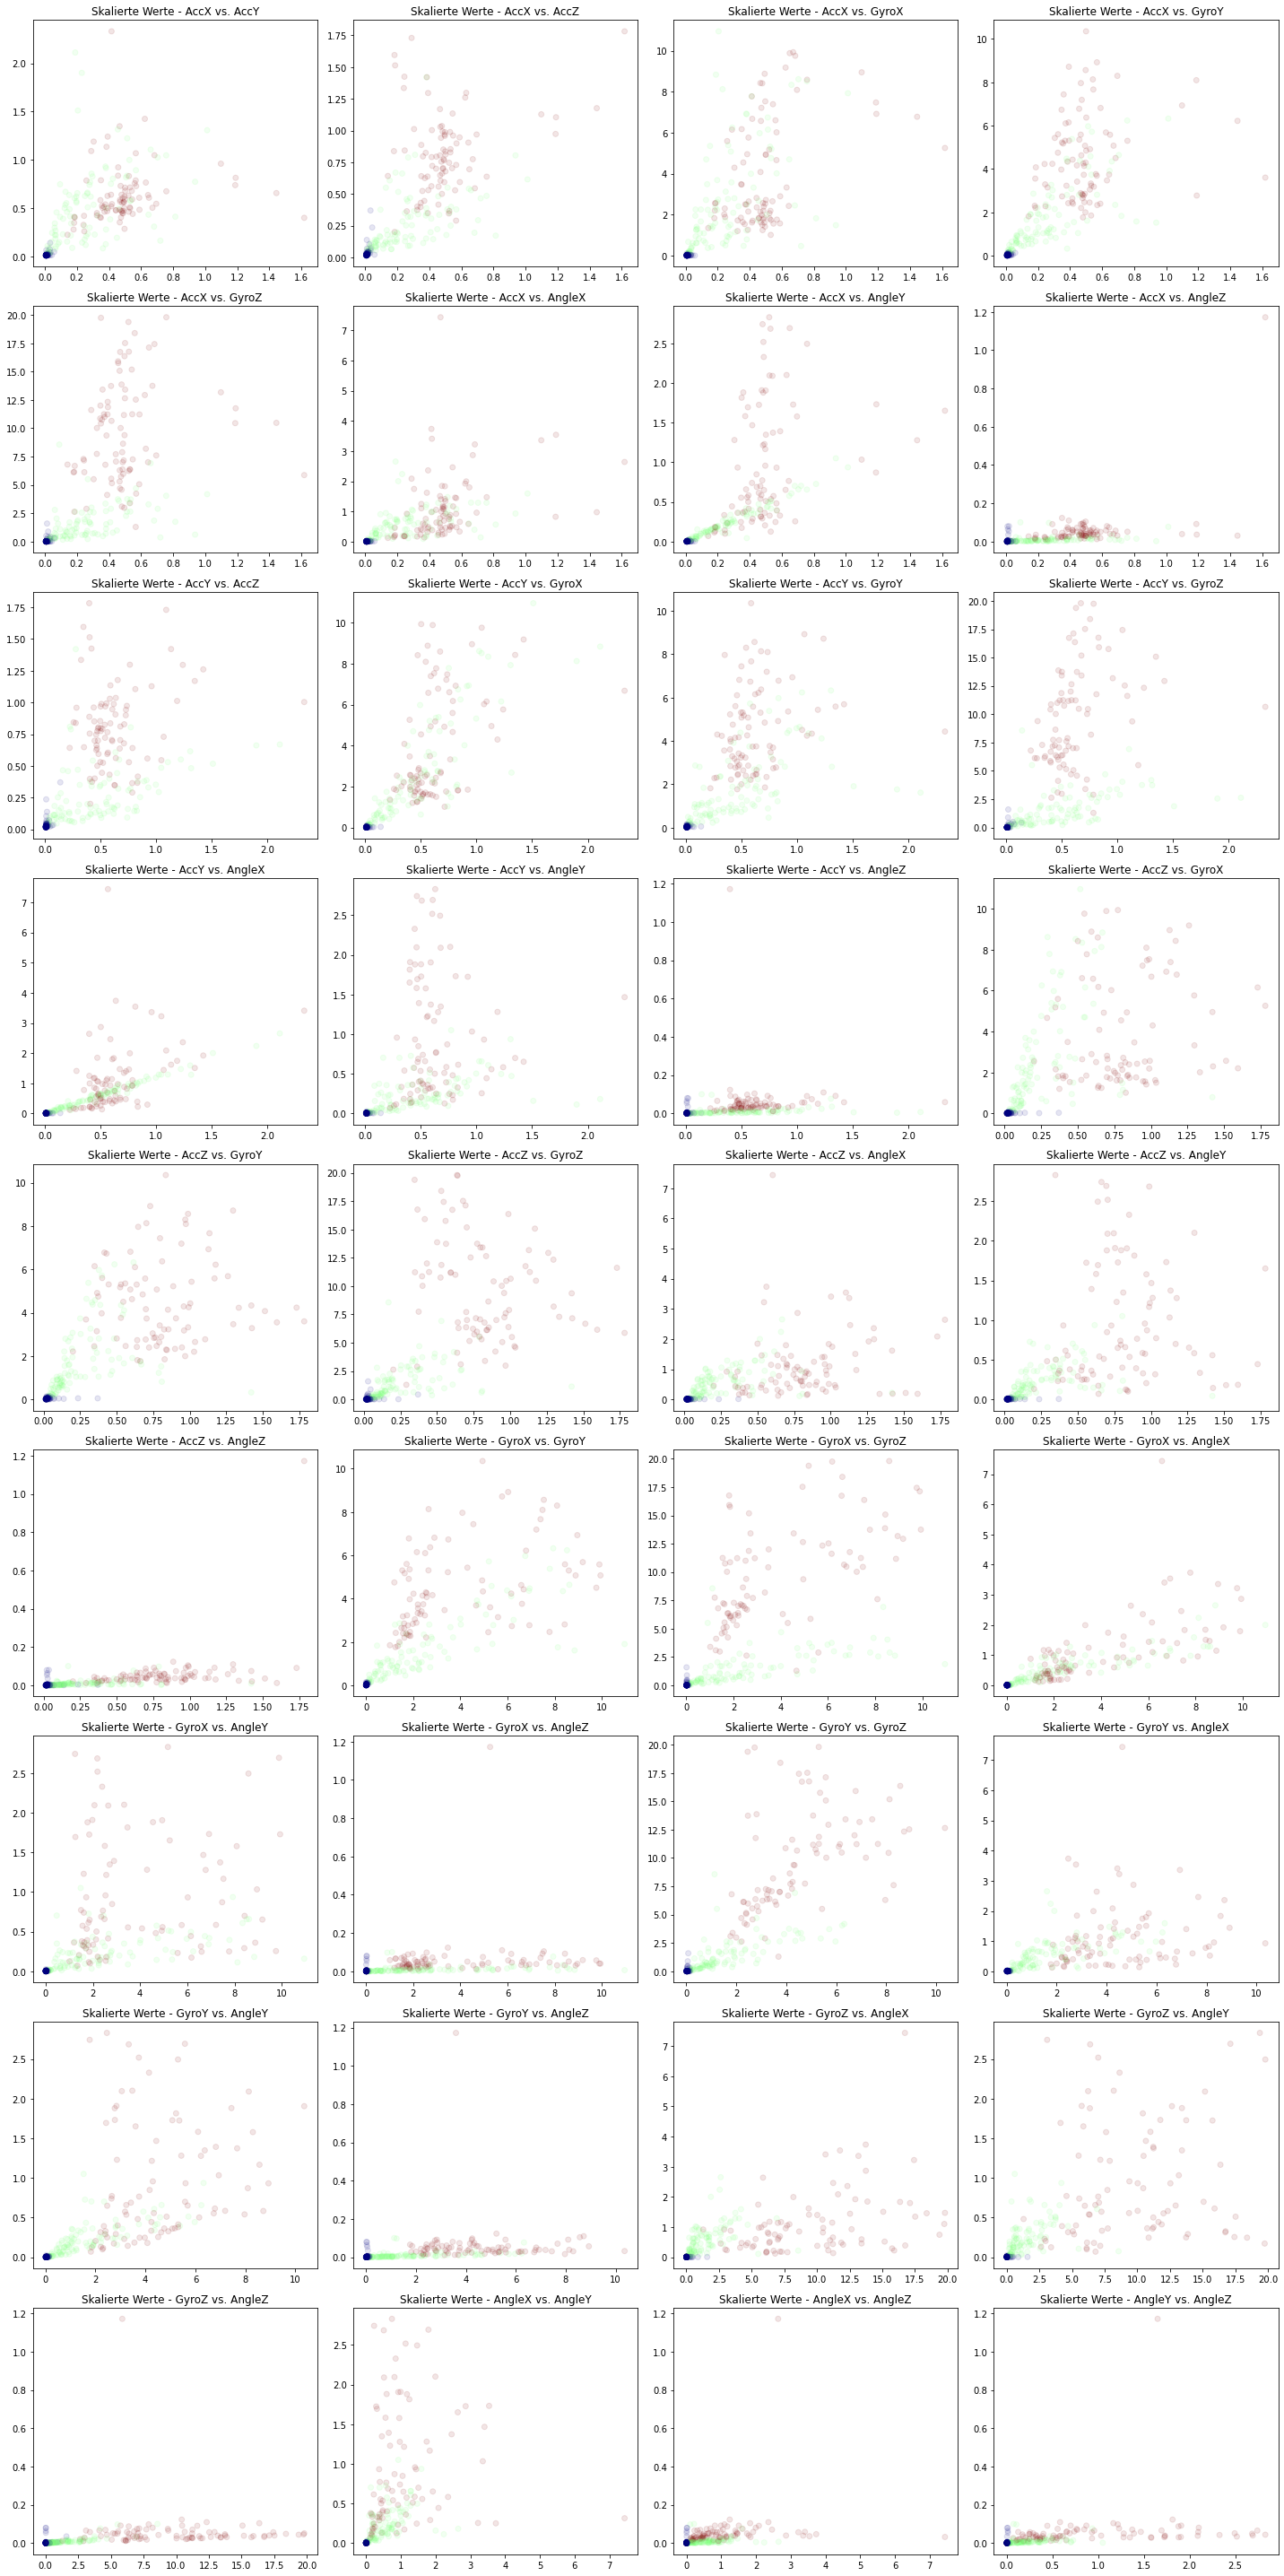

In [24]:
from itertools import combinations

# Annahme: 'data' ist dein ursprüngliches DataFrame mit den Daten

# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Liste aller Labels
all_labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

# Erstelle alle möglichen Kombinationen von Label-Paaren
label_pairs = list(combinations(all_labels[0:9], 2))
print(len(label_pairs))

# Anzahl der Zeilen und Spalten für die Subplots
num_rows = 9  # Du kannst dies anpassen, um die Anzahl der gewünschten Zeilen zu ändern
num_cols = 4  # Du kannst dies anpassen, um die Anzahl der gewünschten Spalten zu ändern

# Erstelle Subplots
#plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Iteriere durch Label-Paare und erstelle Scatterplots
for i in range(num_rows):
    for j in range(num_cols):
        label_pair = label_pairs[i * num_cols + j]
        axs[i, j].scatter(data_scaled_df[label_pair[0]], data_scaled_df[label_pair[1]], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
        axs[i, j].set_title(f'Skalierte Werte - {label_pair[0]} vs. {label_pair[1]}')

# Verbessere das Layout
plt.tight_layout()
plt.show()


# 15. Vorverarbeitung

In [25]:
#

# 16. Training des kNN

In [69]:
from sklearn import neighbors
import numpy as np

num_features = 14
X = np.zeros([len(data_scaled_df), num_features])
y = data_scaled_df['class']

k = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
features = data_scaled_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')
clf.fit(features, y)

KNeighborsClassifier()

# 17. Prediction

In [70]:
# Prediction mit Test-Array
y_predict = clf.predict(features)

acc = np.mean(y_predict == (data_scaled_df['class']).astype(int).values)
acc

0.9743589743589743

In [71]:
# Prediction mit Validation-Array

# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
val_df = pd.DataFrame(val, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
val_df['class'] = val_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

val_labels = val_df['class']
val_data = val_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')

# Prediction
prediction = clf.predict(val_data)

acc = np.mean(prediction == val_labels.astype(int).values)
acc

1.0

# Python MQTT Client

In [29]:
live_data = {'AccX' :[],
        'AccY' : [],
        'AccZ' : [],
        'GyroX' : [],
        'GyroY' : [],
        'GyroZ' : [],
        'AngleX' : [],
        'AngleY' : [],
        'AngleZ' : [],
        'AccAngleX' : [],
        'AccAngleY' : [],     
        'RuheState' : 0,
        'FernstState' : 0,
        'TranspState' : 0,}

live_data_df = pd.DataFrame(live_data)


live_data_df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,AngleX,AngleY,AngleZ,AccAngleX,AccAngleY,RuheState,FernstState,TranspState
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MQTT Live-Prediction

In [61]:
import paho.mqtt.client as mqtt
from IPython.display import clear_output


live_data_df = pd.DataFrame(live_data)

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    # client.subscribe("$SYS/#")

# The callback for when a PUBLISH message is received from the server.
counter = 0 # counts how many times angleZ is received 

def on_message(client, userdata, msg):
    # print(msg.topic+" "+str(msg.payload))
    global accX, accY, accZ, gyroX, gyroY, gyroZ, angleX, angleY, angleZ, accAngleX, accAngleY, live_data_df
    global counter
    if(msg.topic == 'accelerationX'):
        accX = msg.payload.decode('UTF-8')
        #print(accX)
    elif(msg.topic == 'accelerationY'):
        accY = msg.payload.decode('UTF-8')
        #print(accY)
    elif(msg.topic == 'accelerationZ'):
        accZ = msg.payload.decode('UTF-8')
    
    elif(msg.topic == 'gyrometerX'):
        gyroX = msg.payload.decode('UTF-8')
    elif(msg.topic == 'gyrometerY'):
        gyroY = msg.payload.decode('UTF-8')
    elif(msg.topic == 'gyrometerZ'):
        gyroZ = msg.payload.decode('UTF-8')

    elif(msg.topic == 'angleX'):
        angleX = msg.payload.decode('UTF-8')
    elif(msg.topic == 'angleY'):
        angleY = msg.payload.decode('UTF-8')
    elif(msg.topic == 'angleZ'):
        angleZ = msg.payload.decode('UTF-8')
    elif(msg.topic == 'accAngleX'):
        accAngleX = msg.payload.decode('UTF-8')
    elif(msg.topic == 'accAngleY'):
        accAngleY = msg.payload.decode('UTF-8')
        counter += 1

        new_row = {
        'AccX' :[accX],
        'AccY' : [accY],
        'AccZ' : [accZ],
        'GyroX' : [gyroX],
        'GyroY' : [gyroY],
        'GyroZ' : [gyroZ],
        'AngleX' : [angleX],
        'AngleY' : [angleY],
        'AngleZ' : [angleZ],
        'AccAngleX' : [accAngleX],
        'AccAngleY' : [accAngleY],
        'RuheState' : 0,
        'FernstState' : 0,
        'TranspState' : 0,
        }
        
        # convert new Data to DataFrame
        new_row = pd.DataFrame(new_row)

        # append new row to live_data_df
        live_data_df = pd.concat([new_row, live_data_df], ignore_index=True)

        # after 30 measurements, call the classifier
        if counter == 10:
            counter = 0
            live_data_scaled = pd.DataFrame(scaler.transform(live_data_df), columns=data.columns)   # scaling our data
            live_data_features = live_data_scaled.drop(columns='RuheState').drop(columns='TranspState').drop(columns='FernstState')
            # live_data_features = live_data_scaled[['AccY', 'GyroX']]

            std_df = live_data_features[selected_columns].std().to_frame().transpose()
            #print(std_df)

            #std_df = pd.DataFrame([['AccY', 'GyroX'], [std_accy, std_gyrox]])

            live_predict = clf.predict(std_df)
            print('Prediction: ', str(live_predict.mean()))
            if round(live_predict.mean()) == 1:
                print('Ruhe') 
            elif round(live_predict.mean()) == 2:
                print('Fernsteuerung') 
            elif round(live_predict.mean()) == 3:
                print('Transport')


            # Plotting 
            plt.figure(figsize=(10, 7))
            plt.scatter(train['AccY'], train['GyroX'],marker=".", alpha=0.3, c=data_scaled_df['class'], cmap=plt.get_cmap('rainbow'))
            plt.scatter(std_df['AccY'], std_df['GyroX'], marker="P", alpha=0.9, c=4, cmap=plt.get_cmap('jet'))
            #print(live_data_features)
            # axes = plt.gca()
            # axes.set_xlim([-5, 5])
            # axes.set_ylim([-20, 20])

            ## ACHTUNG: Glaube die Labels der Prediction passen nicht zu den Features. Im Plot sind falsche Farben in falschen Bereichen zu erkennen

            # Verbessere das Layout
            plt.tight_layout()
            plt.show()

            clear_output(wait=True)

            # Reset live_predict and live_data_df
            live_predict = None
            live_data_df = live_data_df.head(20) # keep 20 rows of the currenct frame

    

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("192.168.137.1", 1883, 60)
client.subscribe("ESP_message", 0)
client.subscribe("accelerationX", 0)
client.subscribe("accelerationY", 0)
client.subscribe("accelerationZ", 0)
client.subscribe("gyrometerX", 0)
client.subscribe("gyrometerY", 0)
client.subscribe("gyrometerZ", 0)
client.subscribe("angleX", 0)
client.subscribe("angleY", 0)
client.subscribe("angleZ", 0)
client.subscribe("accAngleX", 0)
client.subscribe("accAngleY", 0)


# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

KeyboardInterrupt: 

In [ ]:
# Standardabweichung

data_features = data[['AccY', 'GyroX']]

std_accy = data_features[['AccY']].std()
std_gyrox = data_features[['GyroX']].std()


In [ ]:
x = np.linspace(0, 1, 100)
X0, X1 = np.meshgrid(x, x)
Xstack = np.dstack((X0, X1))
Y = np.zeros(X0.shape)
for r in range(100):
    for c in range(100):
        Y[r, c] = clf.predict(Xstack[r, c, :].reshape(1, -1))

plt.contourf(X0, X1, Y, cmap=plt.get_cmap('jet'))


# Ansatz Classifier nur mit Acc Y und Gyro X

In [62]:
# Training

num_features = 14
labels = data_scaled_df['class']

k = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
features = data_scaled_df[['AccY', 'GyroX']]
clf.fit(features, labels)

KNeighborsClassifier()

In [63]:
# Prediction

val_labels = val_df['class']
val_features = val_df[['AccY', 'GyroX']]

# Prediction
prediction = clf.predict(val_features)

acc = np.mean(prediction == val_labels.astype(int).values)
acc

0.5161290322580645

# Confusion Matrix

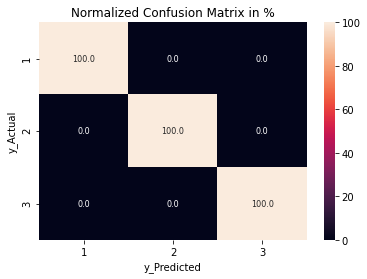

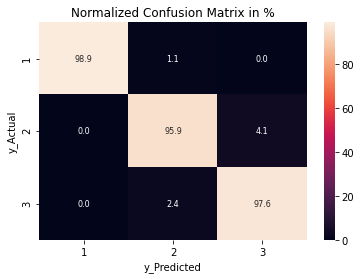

In [48]:
import seaborn as sns
import pandas as pd

def confusion_matrix(results, labels):
    data = {'y_Actual': results.astype(np.uint8), 'y_Predicted': labels}
    df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
    cm = pd.crosstab(df['y_Actual'], df['y_Predicted'])
    cm = cm.astype(np.float32) / cm.sum(axis=1).values[:, np.newaxis] * 100.0
    sns.heatmap(cm, annot=True, fmt='.1f', annot_kws={"size": 8})
    plt.title('Normalized Confusion Matrix in %')
    plt.show()

confusion_matrix(prediction, val_labels.astype(int).values) # val confusion Matrix
confusion_matrix(y_predict, (data_scaled_df['class']).astype(int).values)   # train confusion Matrix

# Confusion Matrix mit verarbeiteten Daten

In [ ]:
# Confusion Matrix mit verarbeiteten Daten

confusion_matrix(prediction, val_labels.astype(int).values) 
confusion_matrix(y_predict, (data_scaled_df['class']).astype(int).values)   # train confusion Matrix